In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt

In [21]:
def significant_corr(df,a,b):
  import scipy.stats as stats
  r = stats.pearsonr(df[a], df[b])
  if r[1] < 0.1:
    return (True,r[0])
  else:
    return (False,0)

def print_significant_corr(df,a,b):
  import scipy.stats as stats
  r = stats.pearsonr(df[a], df[b])
  if r[1] < 0.1:
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    print('*Statistically significant*')
    print('***********************************************')

In [25]:
ieco_grf_df=pd.read_csv('iEco_&_graph.csv')
ieco_df=pd.read_csv('iEco.csv')
grf_df=pd.read_csv('../Tidy_DataFrame.csv')

grf_sin_islas_nd=pd.read_csv('../Gephi_sin_islas/CABA sin islas nodes.csv')

In [22]:
list1=list(ieco_df.keys())
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')
list2.remove('Menciones')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))

In [23]:
for keys in positive_pairs:
    print_significant_corr(ieco_grf_df,keys[0],keys[1])

Correlation between:  Unnamed: 0   and   Modularidad con pesos (0.8)
**********************************************
Pearson Correlation: 0.9070035925942317, p-value: 0.012570365792290258
*Statistically significant*
***********************************************
Correlation between:  2.02 I-Funding   and   Diámetro
**********************************************
Pearson Correlation: 0.7385065695777545, p-value: 0.09362791589032411
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   avg strength
**********************************************
Pearson Correlation: 0.952116314101418, p-value: 0.00338437607108655
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Modularidad sin pesos (1.0)
**********************************************
Pearson Correlation: 0.734259553485187, p-value: 0.09654394994934125
*Statistically significant*
*************************

In [24]:
for keys in negative_pairs:
    print_significant_corr(ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04 I-Demand   and   weight
**********************************************
Pearson Correlation: -0.7513026741395321, p-value: 0.08508453028112797
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   indegree
**********************************************
Pearson Correlation: -0.7930354359599854, p-value: 0.05981890185570923
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   outdegree
**********************************************
Pearson Correlation: -0.7930354359599854, p-value: 0.05981890185570923
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Degree
**********************************************
Pearson Correlation: -0.7930354359599853, p-value: 0.059818901855709296
*Statistically significant*
***********************************************
Correlation be

In [38]:
#grf_sin_islas_nd=grf_sin_islas_nd.drop('indegree',axis=1)
#grf_sin_islas_nd=grf_sin_islas_nd.drop('outdegree',axis=1)
#grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted indegree',axis=1)
#grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted outdegree',axis=1)
#grf_sin_islas_nd=grf_sin_islas_nd.drop('timeset',axis=1)
#grf_sin_islas_nd=grf_sin_islas_nd.drop('Id',axis=1)
#grf_sin_islas_nd=grf_sin_islas_nd.drop('modularity_class',axis=1)

grf_sin_islas_nd

,Label,d1,d0,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub
0,El Cronista,1.200000,Promotor,2,6,4,0.352201,0.378720,1.910913,0.059762,0.000000
1,Endeavor Argentina,7.600000,Habilitador,22,71,3,0.497778,0.563988,484.279725,0.350454,0.089742
2,UNSAM,1.800000,Generador de conocimiento,3,11,4,0.369637,0.398065,10.822184,0.055075,0.007620
3,IncUBAgro,1.600000,Habilitador,9,36,4,0.392982,0.436756,160.377233,0.009692,0.086704
4,Namastrade,0.200000,Habilitador,2,2,5,0.284987,0.305506,0.000000,0.000000,0.008552
...,...,...,...,...,...,...,...,...,...,...,...
108,SEPYME,16.799999,Articulador,34,109,3,0.565657,0.625000,1045.433890,0.505138,0.132082
109,CONICET,5.200000,Articulador,7,26,4,0.435798,0.472470,95.553264,0.196161,0.000000
110,Club Trama,1.800000,Comunidad,4,6,4,0.405797,0.436756,8.704167,0.014348,0.045557
111,Ministerio de Producción y Trabajo,8.600000,Articulador,10,33,4,0.402878,0.454613,165.348171,0.146872,0.000321


In [39]:
num_sin_islas=grf_sin_islas_nd.drop('Label',axis=1)
num_sin_islas=num_sin_islas.drop('d0',axis=1)
num_sin_islas

,d1,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub
0,1.200000,2,6,4,0.352201,0.378720,1.910913,0.059762,0.000000
1,7.600000,22,71,3,0.497778,0.563988,484.279725,0.350454,0.089742
2,1.800000,3,11,4,0.369637,0.398065,10.822184,0.055075,0.007620
3,1.600000,9,36,4,0.392982,0.436756,160.377233,0.009692,0.086704
4,0.200000,2,2,5,0.284987,0.305506,0.000000,0.000000,0.008552
...,...,...,...,...,...,...,...,...,...
108,16.799999,34,109,3,0.565657,0.625000,1045.433890,0.505138,0.132082
109,5.200000,7,26,4,0.435798,0.472470,95.553264,0.196161,0.000000
110,1.800000,4,6,4,0.405797,0.436756,8.704167,0.014348,0.045557
111,8.600000,10,33,4,0.402878,0.454613,165.348171,0.146872,0.000321


In [52]:
from sklearn.preprocessing import StandardScaler

#column_maxes = num_sin_islas.max()
#normalized_sin_islas = num_sin_islas / column_maxes

X=normalized_sin_islas.to_numpy()

normalized_sin_islas= StandardScaler().fit_transform(X)

normalized_sin_islas

array([[-0.44953383, -0.64943703, -0.638651  , ..., -0.46812709,
        -0.01584602, -0.63528399],
       [ 2.21524376,  2.46015551,  2.50537821, ...,  1.95876633,
         4.03840497,  0.49491397],
       [-0.19971093, -0.4939574 , -0.3968026 , ..., -0.42329271,
        -0.08121512, -0.53931879],
       ...,
       [-0.19971093, -0.33847777, -0.638651  , ..., -0.43394888,
        -0.64923034, -0.06154562],
       [ 2.63161525,  0.59439999,  0.66733037, ...,  0.35415826,
         1.19906806, -0.63124136],
       [-0.69935672,  0.59439999,  0.28037292, ...,  0.21676057,
        -0.11719811,  1.71102722]])

In [67]:
#normalized_sin_islas=normalized_sin_islas.drop('Degree',axis=1)
#normalized_sin_islas=normalized_sin_islas.drop('Weighted Degree',axis=1)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(normalized_sin_islas)

kmeans.labels_

array([0, 4, 2, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 2, 3, 0, 2, 2, 3, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 3, 2,
       0, 0, 0, 0, 4, 3, 3, 2, 2, 3, 0, 2, 0, 3, 0, 2, 2, 0, 3, 3, 1, 3,
       1, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 4, 1,
       2, 1, 3])

In [78]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
prin_comp=pca.fit_transform(normalized_sin_islas)

prin_comp_df = pd.DataFrame(data = prin_comp, columns = ['principal component 1', 'principal component 2'])

prin_comp_df

,principal component 1,principal component 2
0,-1.412413,0.258862
1,6.659906,2.223230
2,-0.934391,0.262811
3,0.625324,-0.813272
4,-3.278386,0.312849
...,...,...
108,11.706472,4.948728
109,1.512172,2.063453
110,-0.512061,-0.362019
111,1.826925,2.409508


In [86]:
roles=[]
for i in range(113):
    if prin_comp_df['principal component 1'][i]>0:
        if prin_comp_df['principal component 2'][i]>0:
            roles.append('Articulador')
        else:
            roles.append('Generador de conocimiento')
    else:
        if prin_comp_df['principal component 2'][i]>0:
            roles.append('Habilitador')
        else:
            roles.append('Comunidad')

roles

['Habilitador',
 'Articulador',
 'Habilitador',
 'Generador de conocimiento',
 'Habilitador',
 'Habilitador',
 'Habilitador',
 'Generador de conocimiento',
 'Generador de conocimiento',
 'Habilitador',
 'Habilitador',
 'Habilitador',
 'Habilitador',
 'Comunidad',
 'Habilitador',
 'Generador de conocimiento',
 'Comunidad',
 'Comunidad',
 'Habilitador',
 'Comunidad',
 'Habilitador',
 'Habilitador',
 'Comunidad',
 'Habilitador',
 'Habilitador',
 'Habilitador',
 'Articulador',
 'Generador de conocimiento',
 'Comunidad',
 'Habilitador',
 'Generador de conocimiento',
 'Habilitador',
 'Comunidad',
 'Comunidad',
 'Habilitador',
 'Generador de conocimiento',
 'Articulador',
 'Comunidad',
 'Comunidad',
 'Habilitador',
 'Habilitador',
 'Comunidad',
 'Habilitador',
 'Generador de conocimiento',
 'Habilitador',
 'Generador de conocimiento',
 'Comunidad',
 'Articulador',
 'Generador de conocimiento',
 'Comunidad',
 'Habilitador',
 'Comunidad',
 'Generador de conocimiento',
 'Habilitador',
 'Habilita

In [81]:
print(pca.components_)
print(pca.explained_variance_ratio_)
pca.noise_variance_

[[ 0.28242153  0.37834286  0.37678082 -0.27202297  0.36728138  0.37049777
   0.35638314  0.27112952  0.29740562]
 [ 0.5430792  -0.04827429 -0.03635006  0.32509258 -0.03383781 -0.05654112
  -0.04259071  0.59277462 -0.48804759]]
[0.74578279 0.13452807]


0.1552600203917831

In [66]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(prin_comp)

kmeans.labels_

array([1, 2, 1, 4, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 4, 0, 1, 1, 0, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 4,
       1, 0, 1, 4, 4, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 3, 0,
       0, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4, 1, 1, 1, 0, 1, 1, 4, 0, 2, 3,
       4, 3, 4])

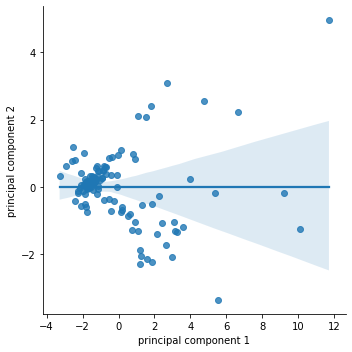

In [63]:
import seaborn as sns

sns.lmplot(x='principal component 1', y='principal component 2', data=prin_comp_df)

In [94]:
attr_mat_df=pd.read_csv('Attribute Mixing Matrices.csv')

attr_mat_df

,Unnamed: 0,Ciudad,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
0,0,CABA,0.015086,0.038793,0.008621,0.017241,0.047414,0.0,0.056034,0.318966,...,0.000000,0.015086,0.032328,0.000000,0.002155,0.015086,0.000000,0.000000,0.004310,0.000000
1,1,CDMX,0.003984,0.023904,0.001992,0.001992,0.011952,0.0,0.037849,0.513944,...,0.000000,0.001992,0.007968,0.003984,0.000000,0.051793,0.005976,0.005976,0.003984,0.003984
2,2,Santiago de Chile,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.371094,...,0.023438,0.003906,0.046875,0.003906,0.000000,0.031250,0.000000,0.011719,0.011719,0.003906
3,3,Montevideo,0.025298,0.055060,0.000000,0.013393,0.031250,0.0,0.072917,0.221726,...,0.004464,0.037202,0.052083,0.000000,0.000000,0.007440,0.000000,0.000000,0.001488,0.008929
4,4,Madrid,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.423780,...,0.006098,0.042683,0.076220,0.000000,0.000000,0.030488,0.006098,0.003049,0.006098,0.000000
5,5,Sao Paulo,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.564576,...,0.003690,0.014760,0.018450,0.003690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
